# Analysis of Influenza cases (laboratory confirmed) in Australia 2008-2017

#### Data Source: NATIONAL NOTIFIABLE DISEASES SURVEILLANCE SYSTEM
#### http://www9.health.gov.au/cda/source/pub_influ.cfm

In [36]:
## *** Import releevant libraries ***

import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [37]:
## Open the raw data file
### Source: Influenza (laboratory confirmed) Public dataset from Department of Health, Australian Government
### http://www9.health.gov.au/cda/source/pub_influ.cfm
flu_data = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Project 1\Data\Australian Influenza Public Dataset 2008 to 2017.csv")

In [38]:
##How does the data look?
flu_data.head(2)

,Week Ending,State,Age Group,Sex,Indigenous Status,Type
0,5/01/2018,NSW,00-04,Female,not available,B
1,5/01/2018,NSW,00-04,Female,not available,B


In [39]:
# Are there any missing values?
flu_data.isnull().sum()

Week Ending          0
State                0
Age Group            0
Sex                  0
Indigenous Status    0
Type                 0
dtype: int64

In [40]:
# Are the age goups OK?
flu_data.dtypes

Week Ending          object
State                object
Age Group            object
Sex                  object
Indigenous Status    object
Type                 object
dtype: object

In [41]:
# Check the Age Groups
flu_data.groupby('Age Group').count()

,Week Ending,State,Sex,Indigenous Status,Type
Age Group,,,,,
00-04,75022,75022,75022,75022,75022
15-19,42106,42106,42106,42106,42106
20-24,34609,34609,34609,34609,34609
25-29,35323,35323,35323,35323,35323
30-34,40189,40189,40189,40189,40189
35-39,41661,41661,41661,41661,41661
40-44,39578,39578,39578,39578,39578
45-49,36257,36257,36257,36257,36257
5-Sep,72857,72857,72857,72857,72857


In [42]:
### update Age-Group
### 05/09/2020 - 05-09
### 14/10/2019 - 14-10

flu_data['Age Group'].replace({"5-Sep": "05-09", "Oct-14": "10-14"}, inplace=True)

In [43]:
# Check the Age Groups again
flu_data.groupby('Age Group').count()

,Week Ending,State,Sex,Indigenous Status,Type
Age Group,,,,,
00-04,75022,75022,75022,75022,75022
05-09,72857,72857,72857,72857,72857
10-14,47760,47760,47760,47760,47760
15-19,42106,42106,42106,42106,42106
20-24,34609,34609,34609,34609,34609
25-29,35323,35323,35323,35323,35323
30-34,40189,40189,40189,40189,40189
35-39,41661,41661,41661,41661,41661
40-44,39578,39578,39578,39578,39578


In [44]:
# Change the data types of each each column
flu_data['Week Ending'] = pd.to_datetime(flu_data['Week Ending'])

In [45]:
# Check the dtypes
flu_data.dtypes

Week Ending          datetime64[ns]
State                        object
Age Group                    object
Sex                          object
Indigenous Status            object
Type                         object
dtype: object

In [46]:
# check the values
flu_data.head()

,Week Ending,State,Age Group,Sex,Indigenous Status,Type
0,2018-05-01,NSW,00-04,Female,not available,B
1,2018-05-01,NSW,00-04,Female,not available,B
2,2018-05-01,NSW,00-04,Male,not available,A(unsubtyped)
3,2018-05-01,NSW,20-24,Male,not available,B
4,2018-05-01,NSW,25-29,Male,not available,A(unsubtyped)


In [47]:
# Check a sample of the data:
flu_data.sample(20)

,Week Ending,State,Age Group,Sex,Indigenous Status,Type
32012,2017-09-29,Vic,80-84,Male,not available,B
211060,2017-07-21,NSW,25-29,Female,not available,A(unsubtyped)
552435,2012-03-08,Qld,30-34,Female,Unknown,A(unsubtyped)
168212,2017-11-08,Vic,25-29,Female,not available,A(unsubtyped)
477181,2014-08-15,NSW,30-34,Female,not available,A(unsubtyped)
362349,2015-11-09,SA,85+,Female,not available,A(unsubtyped)
482857,2014-08-08,Qld,05-09,Male,non-Indigenous,A(unsubtyped)
5534,2017-03-11,NSW,30-34,Male,not available,B
160326,2017-08-18,NSW,10-14,Male,not available,A(unsubtyped)
603989,2010-10-15,SA,30-34,Female,not available,A(H1N1)pdm09


In [48]:
# What do the statistics look like?
flu_data.describe()

,Week Ending,State,Age Group,Sex,Indigenous Status,Type
count,681254,681254,681254,681254,681254,681254
unique,523,7,19,4,4,8
top,2017-08-18 00:00:00,NSW,00-04,Female,not available,A(unsubtyped)
freq,24004,229134,75022,366829,447393,353092
first,2008-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN


### All cases by Age Group

In [49]:
## Summary of cases by age for 2008-2017
Age_Summary = flu_data.groupby("Age Group").agg({'Week Ending':['count']})

In [50]:
Age_Summary.head(10)

,Week Ending
,count
Age Group,
00-04,75022
05-09,72857
10-14,47760
15-19,42106
20-24,34609
25-29,35323
30-34,40189
35-39,41661


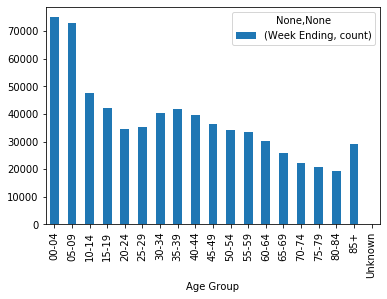

In [51]:
Age_Summary.plot.bar()


In [52]:
# Testing graph labels
Age_Summary = flu_data.groupby("Age Group").agg({'Week Ending':['count']})


In [53]:
# Testing Column labels
Age_Summary.columns


MultiIndex([('Week Ending', 'count')],
           )

In [54]:
# Rename Age Summary Columns
Age_Summary.rename(columns = {'count':'Confirmed Cases 2008-2017'}, inplace = True) 

In [55]:
Age_Summary.head()

,Week Ending
,Confirmed Cases 2008-2017
Age Group,
00-04,75022
05-09,72857
10-14,47760
15-19,42106
20-24,34609


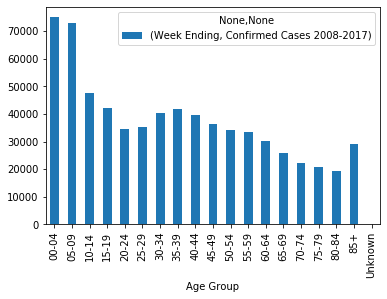

In [56]:
# Graph with corrected headings
Age_Summary.plot.bar()

In [57]:
### Add Year to dataset ###
flu_data["Year"] = pd.DatetimeIndex(flu_data['Week Ending']).year

In [58]:
flu_data.head()

,Week Ending,State,Age Group,Sex,Indigenous Status,Type,Year
0,2018-05-01,NSW,00-04,Female,not available,B,2018
1,2018-05-01,NSW,00-04,Female,not available,B,2018
2,2018-05-01,NSW,00-04,Male,not available,A(unsubtyped),2018
3,2018-05-01,NSW,20-24,Male,not available,B,2018
4,2018-05-01,NSW,25-29,Male,not available,A(unsubtyped),2018


In [59]:
### Add Month & Year to dataset ###
flu_data['Month_Year'] = pd.to_datetime(flu_data['Week Ending']).dt.to_period('M')

In [60]:
flu_data.head()

,Week Ending,State,Age Group,Sex,Indigenous Status,Type,Year,Month_Year
0,2018-05-01,NSW,00-04,Female,not available,B,2018,2018-05
1,2018-05-01,NSW,00-04,Female,not available,B,2018,2018-05
2,2018-05-01,NSW,00-04,Male,not available,A(unsubtyped),2018,2018-05
3,2018-05-01,NSW,20-24,Male,not available,B,2018,2018-05
4,2018-05-01,NSW,25-29,Male,not available,A(unsubtyped),2018,2018-05


In [61]:
Year_Summary = flu_data.groupby("Year").agg({'Year':['count']})

In [62]:
Year_Summary.head()

,Year
,count
Year,
2008,8906
2009,57777
2010,13358
2011,26960
2012,43831


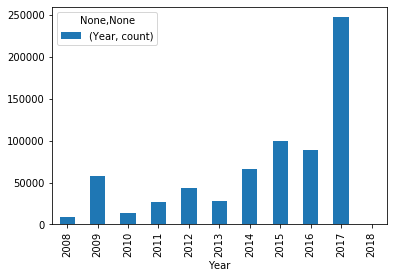

In [63]:
## Annual Flu cases in Australia 2008 - 2017
Year_Summary.plot.bar()

In [64]:
YearMonth_Summary = flu_data.groupby("Month_Year").agg({'Month_Year':['count']})

In [65]:
YearMonth_Summary.head()

,Month_Year
,count
Month_Year,
2008-01,248
2008-02,149
2008-03,504
2008-04,204
2008-05,1225


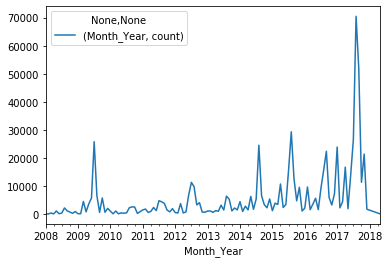

In [66]:
# Plot showing monthly cases
YearMonth_Summary.plot()

In [67]:
#  5 year - 2008 - 2013
YearRangeSummary = flu_data[(flu_data['Week Ending'] > '2008-1-1 01:00:00') & (flu_data['Week Ending'] <= '2013-12-31 04:00:00')]

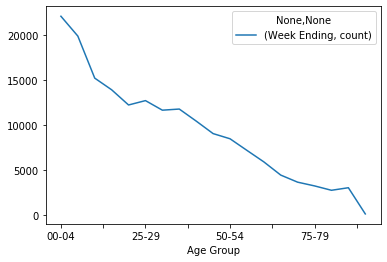

In [68]:
# Cases by Age range 2008-2013
YearRangeSummary.groupby("Age Group").agg({'Week Ending':['count']}).plot()

In [69]:
#  5 year - 2013 - 2017
YearRangeSummary = flu_data[(flu_data['Week Ending'] > '2013-1-1 01:00:00') & (flu_data['Week Ending'] <= '2017-12-31 04:00:00')]

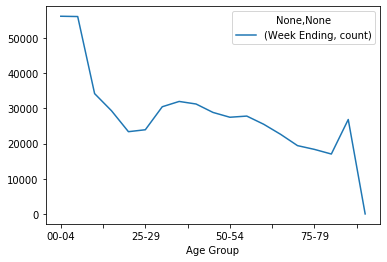

In [70]:
# Cases by Age Range 2013-2017
YearRangeSummary.groupby("Age Group").agg({'Week Ending':['count']}).plot()

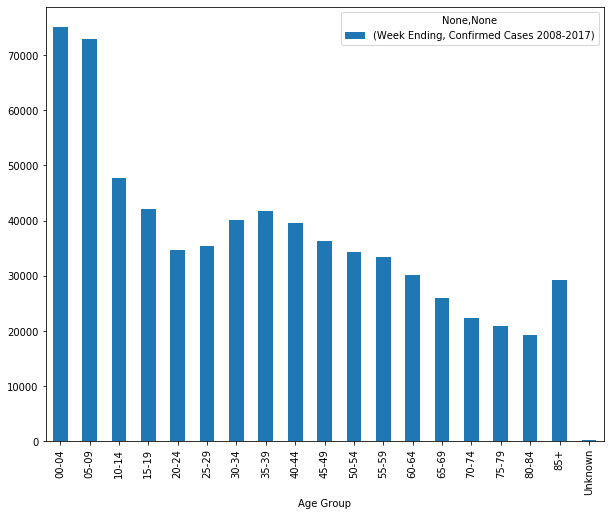

In [75]:
# Graph with corrected headings - resized for PowerPoint

Age_Summary.plot.bar(figsize=(10,8))


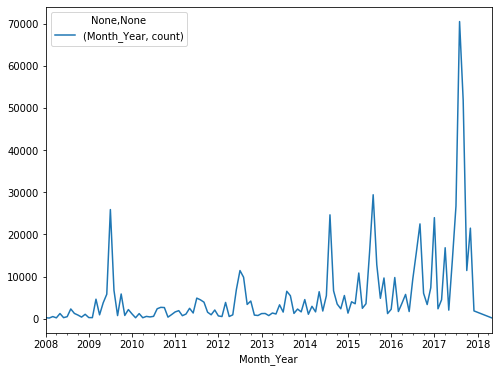

In [81]:
# Plot showing monthly cases for Power Point Presentation
YearMonth_Summary.plot(figsize=(8, 6))